In [879]:
# %pip install statsmodels
# %pip install pandas
# %pip install matplotlib

In [880]:
VOLZA_FILE_PATH = '../../../volza/magnesium/magnesium.csv'

# The number of countries to analyze. 10 is the default, but you can change it to whatever you want
# We will only analyze the top 10 countries by the number of samples
NUMBER_OF_COUNTRIES_TO_ANALYZE = 5

# Column names just so we don't have to constantly type them
VALUE_COLUMN='Value'
COUNTRY_OF_ORIGIN_COLUMN='Country of Origin'
COUNTRY_OF_DESTINATION_COLUMN='Country of Destination'

TIME_METRIC = '7D'

In [881]:
import pandas
data = pandas.read_csv(VOLZA_FILE_PATH)
data['Date'] = pandas.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
data.set_index('Date', inplace=True)

In [882]:
import warnings
warnings.filterwarnings('ignore')

# **Stationarity**

### **ADF Test** (Stationarity)

In [883]:
from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    result = adfuller(df.values)

    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value), end=' \t')
        print('\tIs stationary: %s' % ('No', 'Yes')[1 if result[0] < result[4][key] else 0])

### **KPSS Test** (Trend Stationarity)

In [884]:
from statsmodels.tsa.stattools import kpss
def kpss_test(df):
  """Tests for stationarity, null hypothesis is that the series is stationary"""
  statistic, p_value, n_lags, critical_values = kpss(df.values)
  print(f'KPSS Statistic: {statistic}')
  print(f'p-value: {p_value}')
  print(f'num lags: {n_lags}')
  print('Critial Values:')
  for key, value in critical_values.items():
    print('\t%s: %.3f' % (key, value), end=' \t')
    print('\tIs stationary: %s' % ('No', 'Yes')[1 if p_value < float(key[:-1]) else 0])

# **Autocorrelation / Partial Autocorrelation**

In [885]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

def autocorrelation_plots(df, lag):
  fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
  plot_acf(df, lags=lag, ax=axes[0])
  plot_pacf(df, lags=lag, ax=axes[1], method='ywm')
  plt.show()


### **Pearson and Spearman Correlation**

In [886]:
from scipy.stats import pearsonr, spearmanr

def spearman_correlation(original, target):
  print("Spearman Correlation")
  print(spearmanr(original, target))

def pearson_correlation(original, target):
  print("Pearson Correlation")
  print(pearsonr(original, target))

# **Granger Causality Test**

In [887]:
from statsmodels.tsa.stattools import grangercausalitytests

# Granger causality test which accounts for unmatched lengths of the two series
def grangercausality_test(combined, maxlag):
  grangercausalitytests(combined, maxlag=maxlag, verbose=True)


Country of Origin
China
ADF Statistics: -2.089025
p-value: 0.248951
Critical values:
	1%: -3.475 		Is stationary: No
	5%: -2.881 		Is stationary: No
	10%: -2.577 		Is stationary: No
KPSS Statistic: 0.6834146937415495
p-value: 0.015053209659859134
num lags: 7
Critial Values:
	10%: 0.347 		Is stationary: Yes
	5%: 0.463 		Is stationary: Yes
	2.5%: 0.574 		Is stationary: Yes
	1%: 0.739 		Is stationary: Yes


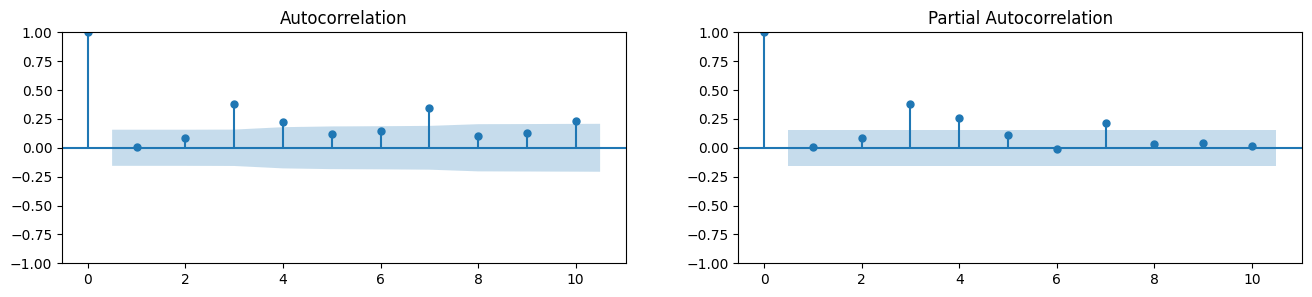


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3451  , p=0.0388  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=4.4303  , p=0.0353  , df=1
likelihood ratio test: chi2=4.3686  , p=0.0366  , df=1
parameter F test:         F=4.3451  , p=0.0388  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6552  , p=0.0282  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=7.5541  , p=0.0229  , df=2
likelihood ratio test: chi2=7.3758  , p=0.0250  , df=2
parameter F test:         F=3.6552  , p=0.0282  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.8394  , p=0.0111  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=12.0667 , p=0.0072  , df=3
likelihood ratio test: chi2=11.6173 , p=0.0088  , df=3
parameter F test:         F=3.8394  , p=0.0111  , df_denom=147, df_num=3
Granger Causality Test: China | Netherlands
Spearman Correlation
SpearmanrResult(correlation=0

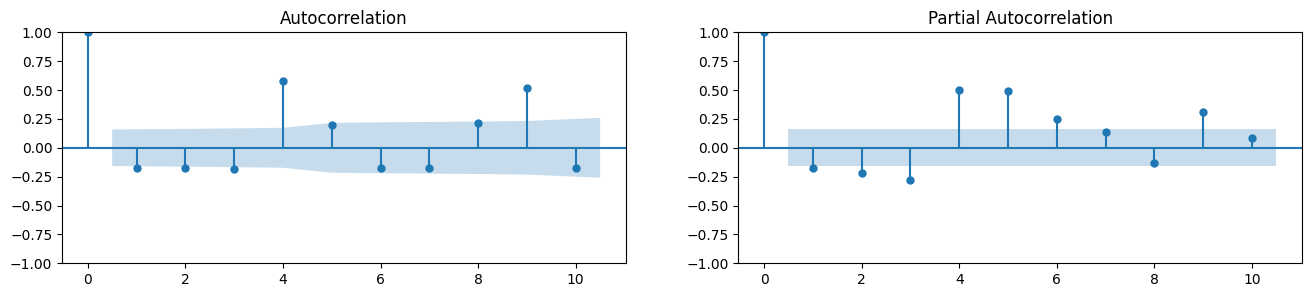


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3410  , p=0.0222  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=5.4457  , p=0.0196  , df=1
likelihood ratio test: chi2=5.3528  , p=0.0207  , df=1
parameter F test:         F=5.3410  , p=0.0222  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8911  , p=0.0586  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=5.9749  , p=0.0504  , df=2
likelihood ratio test: chi2=5.8626  , p=0.0533  , df=2
parameter F test:         F=2.8911  , p=0.0586  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.5285  , p=0.0000  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=29.9466 , p=0.0000  , df=3
likelihood ratio test: chi2=27.3647 , p=0.0000  , df=3
parameter F test:         F=9.5285  , p=0.0000  , df_denom=147, df_num=3
Granger Causality Test: Netherlands | China
Spearman Correlation
SpearmanrResult(correlation=0

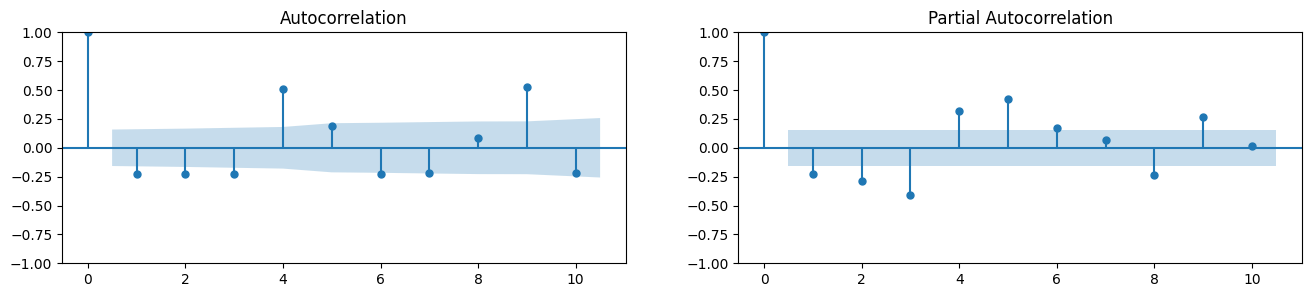


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0070  , p=0.9334  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=0.0072  , p=0.9326  , df=1
likelihood ratio test: chi2=0.0072  , p=0.9326  , df=1
parameter F test:         F=0.0070  , p=0.9334  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0708  , p=0.9317  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=0.1463  , p=0.9295  , df=2
likelihood ratio test: chi2=0.1463  , p=0.9295  , df=2
parameter F test:         F=0.0708  , p=0.9317  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2847  , p=0.2819  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=4.0377  , p=0.2574  , df=3
likelihood ratio test: chi2=3.9857  , p=0.2630  , df=3
parameter F test:         F=1.2847  , p=0.2819  , df_denom=147, df_num=3
Granger Causality Test: Germany | China
Spearman Correlation
SpearmanrResult(correlation=0.666

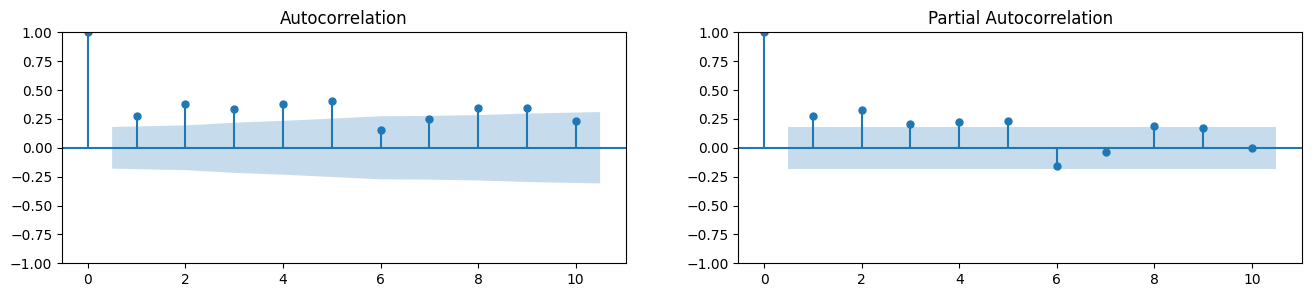


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=36.0031 , p=0.0000  , df_denom=271, df_num=1
ssr based chi2 test:   chi2=36.4016 , p=0.0000  , df=1
likelihood ratio test: chi2=34.1785 , p=0.0000  , df=1
parameter F test:         F=36.0031 , p=0.0000  , df_denom=271, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.1675  , p=0.0009  , df_denom=268, df_num=2
ssr based chi2 test:   chi2=14.6025 , p=0.0007  , df=2
likelihood ratio test: chi2=14.2253 , p=0.0008  , df=2
parameter F test:         F=7.1675  , p=0.0009  , df_denom=268, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.5638  , p=0.0039  , df_denom=265, df_num=3
ssr based chi2 test:   chi2=14.0530 , p=0.0028  , df=3
likelihood ratio test: chi2=13.7020 , p=0.0033  , df=3
parameter F test:         F=4.5638  , p=0.0039  , df_denom=265, df_num=3
Granger Causality Test: Turkey | China
Spearman Correlation
SpearmanrResult(correlation=-0.737

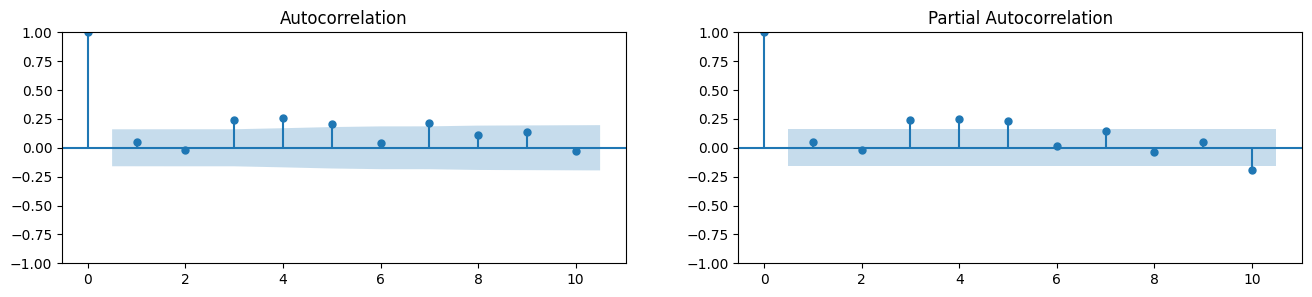


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.0890 , p=0.0010  , df_denom=303, df_num=1
ssr based chi2 test:   chi2=11.1988 , p=0.0008  , df=1
likelihood ratio test: chi2=10.9987 , p=0.0009  , df=1
parameter F test:         F=11.0890 , p=0.0010  , df_denom=303, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.2374  , p=0.0058  , df_denom=300, df_num=2
ssr based chi2 test:   chi2=10.6493 , p=0.0049  , df=2
likelihood ratio test: chi2=10.4676 , p=0.0053  , df=2
parameter F test:         F=5.2374  , p=0.0058  , df_denom=300, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=25.2367 , p=0.0000  , df_denom=297, df_num=3
ssr based chi2 test:   chi2=77.4945 , p=0.0000  , df=3
likelihood ratio test: chi2=69.0289 , p=0.0000  , df=3
parameter F test:         F=25.2367 , p=0.0000  , df_denom=297, df_num=3
Granger Causality Test: South Korea | China
Spearman Correlation
SpearmanrResult(correlation=-

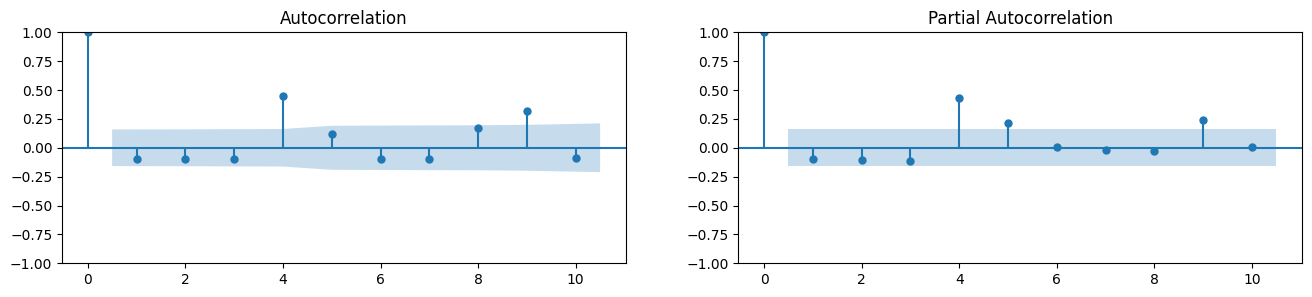


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2643  , p=0.6079  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=0.2695  , p=0.6037  , df=1
likelihood ratio test: chi2=0.2692  , p=0.6039  , df=1
parameter F test:         F=0.2643  , p=0.6079  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3321  , p=0.7179  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=0.6863  , p=0.7095  , df=2
likelihood ratio test: chi2=0.6848  , p=0.7101  , df=2
parameter F test:         F=0.3321  , p=0.7179  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3615  , p=0.7809  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=1.1362  , p=0.7683  , df=3
likelihood ratio test: chi2=1.1320  , p=0.7694  , df=3
parameter F test:         F=0.3615  , p=0.7809  , df_denom=147, df_num=3
Granger Causality Test: Italy | China
Spearman Correlation
SpearmanrResult(correlation=0.65212

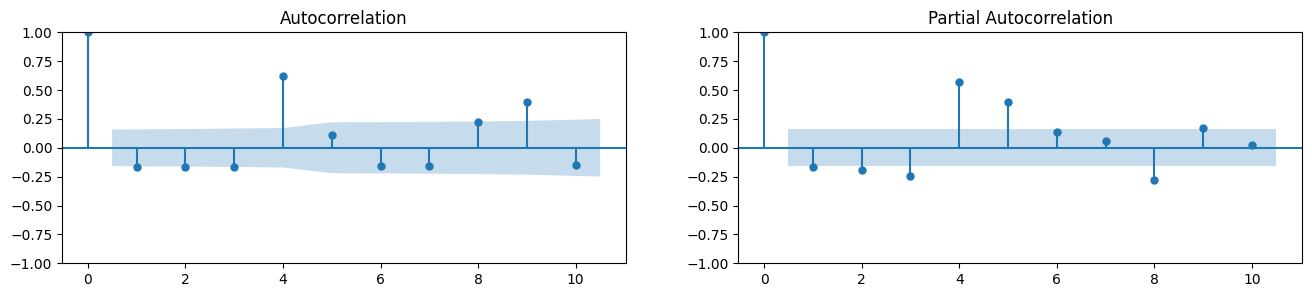


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2074  , p=0.6495  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=0.2115  , p=0.6456  , df=1
likelihood ratio test: chi2=0.2113  , p=0.6457  , df=1
parameter F test:         F=0.2074  , p=0.6495  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0865  , p=0.9172  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=0.1788  , p=0.9145  , df=2
likelihood ratio test: chi2=0.1787  , p=0.9145  , df=2
parameter F test:         F=0.0865  , p=0.9172  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6970  , p=0.5553  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=2.1905  , p=0.5338  , df=3
likelihood ratio test: chi2=2.1751  , p=0.5369  , df=3
parameter F test:         F=0.6970  , p=0.5553  , df_denom=147, df_num=3
Granger Causality Test: Slovenia | China
Spearman Correlation
SpearmanrResult(correlation=0.67

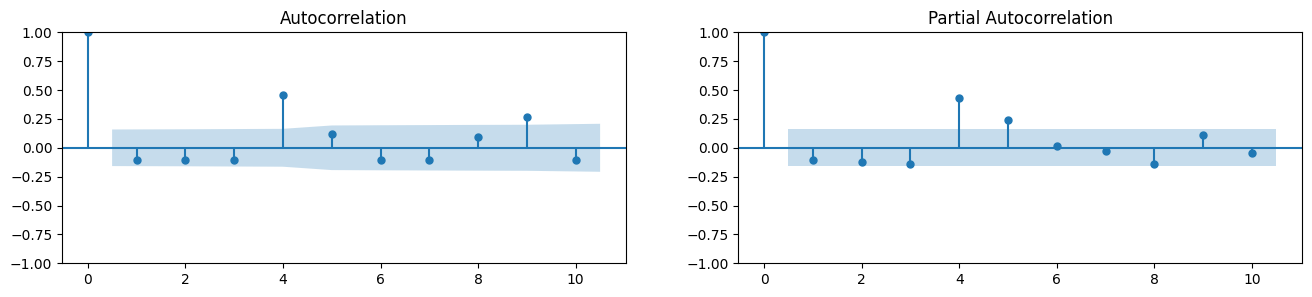


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.3222  , p=0.0076  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=7.4657  , p=0.0063  , df=1
likelihood ratio test: chi2=7.2926  , p=0.0069  , df=1
parameter F test:         F=7.3222  , p=0.0076  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3834  , p=0.0365  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=6.9923  , p=0.0303  , df=2
likelihood ratio test: chi2=6.8392  , p=0.0327  , df=2
parameter F test:         F=3.3834  , p=0.0365  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.8228  , p=0.0009  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=18.3002 , p=0.0004  , df=3
likelihood ratio test: chi2=17.2920 , p=0.0006  , df=3
parameter F test:         F=5.8228  , p=0.0009  , df_denom=147, df_num=3
Granger Causality Test: Poland | China
Spearman Correlation
SpearmanrResult(correlation=0.6740

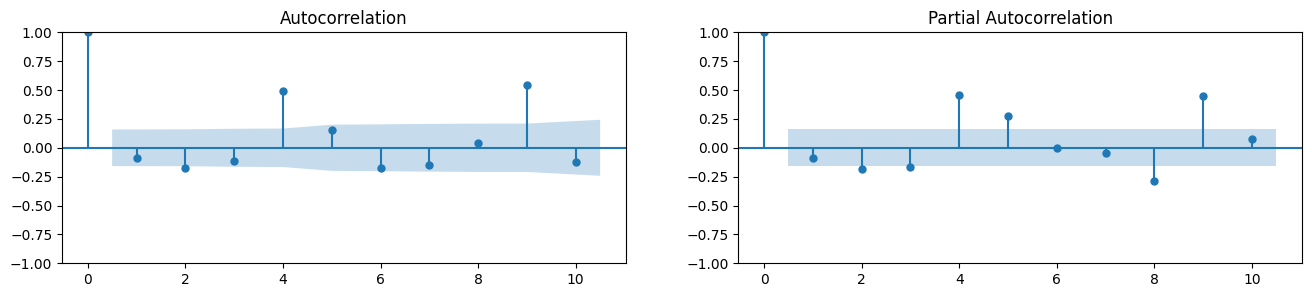


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5765  , p=0.2112  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=1.6074  , p=0.2049  , df=1
likelihood ratio test: chi2=1.5991  , p=0.2060  , df=1
parameter F test:         F=1.5765  , p=0.2112  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7719  , p=0.4640  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=1.5953  , p=0.4504  , df=2
likelihood ratio test: chi2=1.5871  , p=0.4522  , df=2
parameter F test:         F=0.7719  , p=0.4640  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.6839  , p=0.0135  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=11.5781 , p=0.0090  , df=3
likelihood ratio test: chi2=11.1635 , p=0.0109  , df=3
parameter F test:         F=3.6839  , p=0.0135  , df_denom=147, df_num=3
Granger Causality Test: France | China
Spearman Correlation
SpearmanrResult(correlation=0.6324

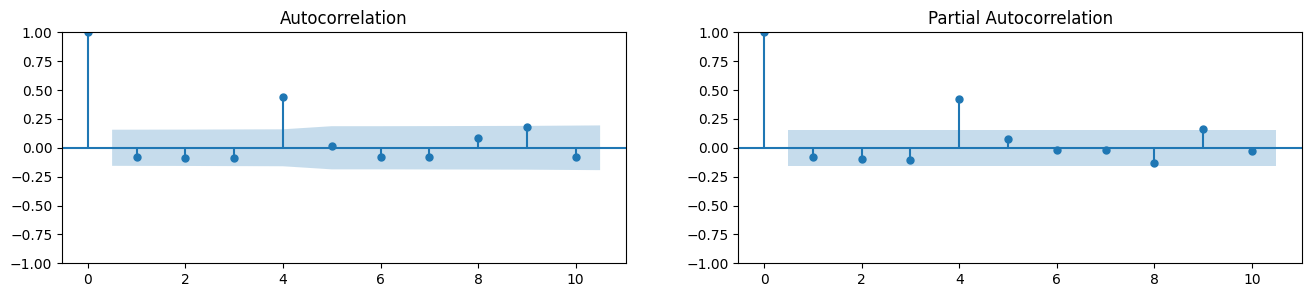


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3124  , p=0.5770  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=0.3185  , p=0.5725  , df=1
likelihood ratio test: chi2=0.3182  , p=0.5727  , df=1
parameter F test:         F=0.3124  , p=0.5770  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5100  , p=0.6015  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=1.0539  , p=0.5904  , df=2
likelihood ratio test: chi2=1.0504  , p=0.5914  , df=2
parameter F test:         F=0.5100  , p=0.6015  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4393  , p=0.7252  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=1.3806  , p=0.7101  , df=3
likelihood ratio test: chi2=1.3745  , p=0.7115  , df=3
parameter F test:         F=0.4393  , p=0.7252  , df_denom=147, df_num=3
Granger Causality Test: Spain | China
Spearman Correlation
SpearmanrResult(correlation=0.70603

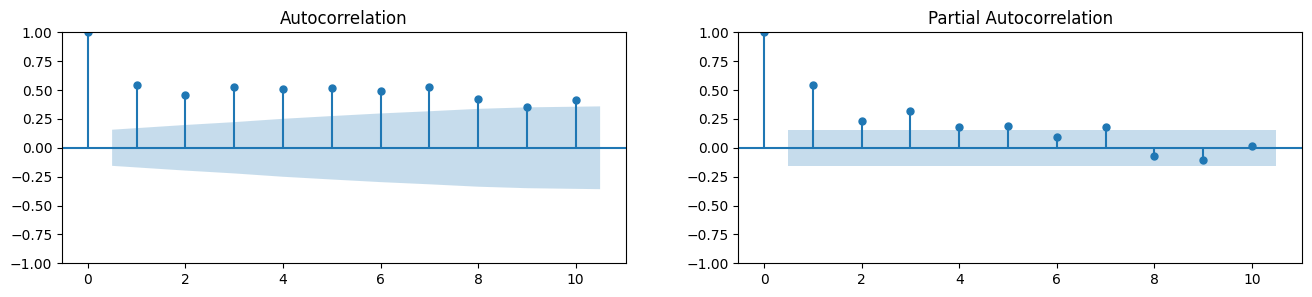


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=81.6739 , p=0.0000  , df_denom=310, df_num=1
ssr based chi2 test:   chi2=82.4643 , p=0.0000  , df=1
likelihood ratio test: chi2=73.1973 , p=0.0000  , df=1
parameter F test:         F=81.6739 , p=0.0000  , df_denom=310, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=13.1148 , p=0.0000  , df_denom=307, df_num=2
ssr based chi2 test:   chi2=26.6568 , p=0.0000  , df=2
likelihood ratio test: chi2=25.5791 , p=0.0000  , df=2
parameter F test:         F=13.1148 , p=0.0000  , df_denom=307, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.6064  , p=0.0000  , df_denom=304, df_num=3
ssr based chi2 test:   chi2=26.4136 , p=0.0000  , df=3
likelihood ratio test: chi2=25.3517 , p=0.0000  , df=3
parameter F test:         F=8.6064  , p=0.0000  , df_denom=304, df_num=3
Granger Causality Test: India | United States
Spearman Correlation
SpearmanrResult(correlation

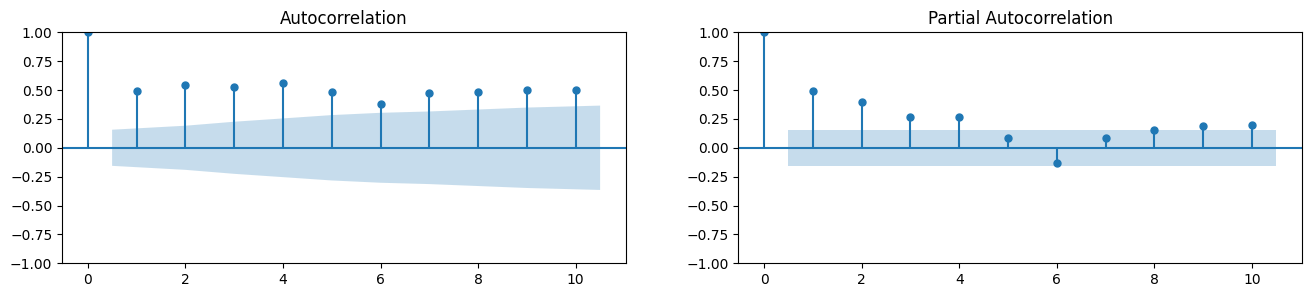


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=71.5564 , p=0.0000  , df_denom=310, df_num=1
ssr based chi2 test:   chi2=72.2489 , p=0.0000  , df=1
likelihood ratio test: chi2=65.0059 , p=0.0000  , df=1
parameter F test:         F=71.5564 , p=0.0000  , df_denom=310, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.1293  , p=0.0004  , df_denom=307, df_num=2
ssr based chi2 test:   chi2=16.5234 , p=0.0003  , df=2
likelihood ratio test: chi2=16.1007 , p=0.0003  , df=2
parameter F test:         F=8.1293  , p=0.0004  , df_denom=307, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.3460  , p=0.0000  , df_denom=304, df_num=3
ssr based chi2 test:   chi2=25.6144 , p=0.0000  , df=3
likelihood ratio test: chi2=24.6142 , p=0.0000  , df=3
parameter F test:         F=8.3460  , p=0.0000  , df_denom=304, df_num=3
Granger Causality Test: United States | India
Spearman Correlation
SpearmanrResult(correlation

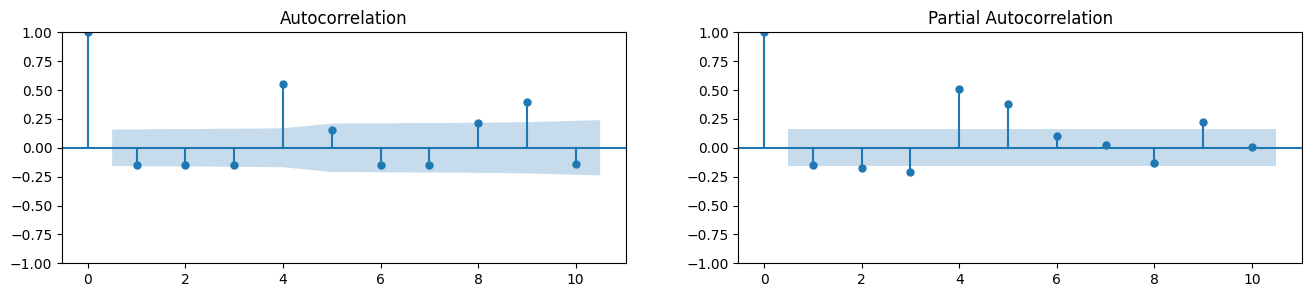


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7160  , p=0.0180  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=5.8281  , p=0.0158  , df=1
likelihood ratio test: chi2=5.7218  , p=0.0168  , df=1
parameter F test:         F=5.7160  , p=0.0180  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.0555  , p=0.0002  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=18.7148 , p=0.0001  , df=2
likelihood ratio test: chi2=17.6684 , p=0.0001  , df=2
parameter F test:         F=9.0555  , p=0.0002  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=19.5713 , p=0.0000  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=61.5098 , p=0.0000  , df=3
likelihood ratio test: chi2=51.7523 , p=0.0000  , df=3
parameter F test:         F=19.5713 , p=0.0000  , df_denom=147, df_num=3
Granger Causality Test: Netherlands | India
Spearman Correlation
SpearmanrResult(correlation=0

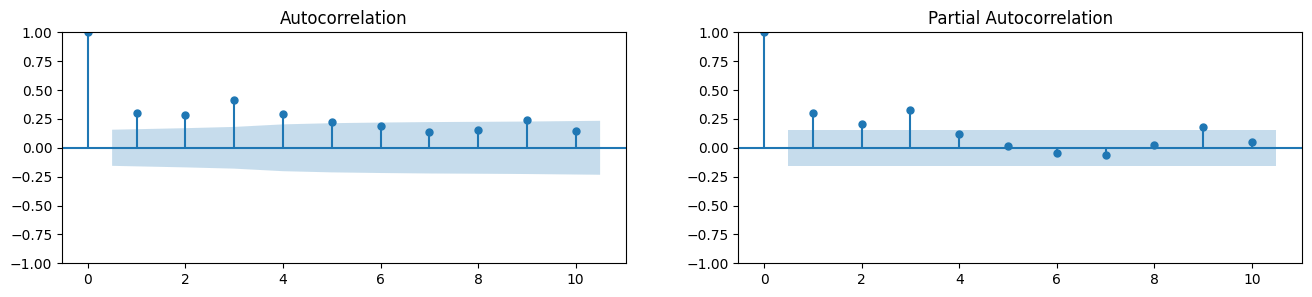


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.9432 , p=0.0000  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=18.2951 , p=0.0000  , df=1
likelihood ratio test: chi2=17.2994 , p=0.0000  , df=1
parameter F test:         F=17.9432 , p=0.0000  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=10.0441 , p=0.0001  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=20.7578 , p=0.0000  , df=2
likelihood ratio test: chi2=19.4806 , p=0.0001  , df=2
parameter F test:         F=10.0441 , p=0.0001  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.9986  , p=0.0025  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=15.7097 , p=0.0013  , df=3
likelihood ratio test: chi2=14.9591 , p=0.0019  , df=3
parameter F test:         F=4.9986  , p=0.0025  , df_denom=147, df_num=3
Granger Causality Test: Vietnam | India
Spearman Correlation
SpearmanrResult(correlation=0.489

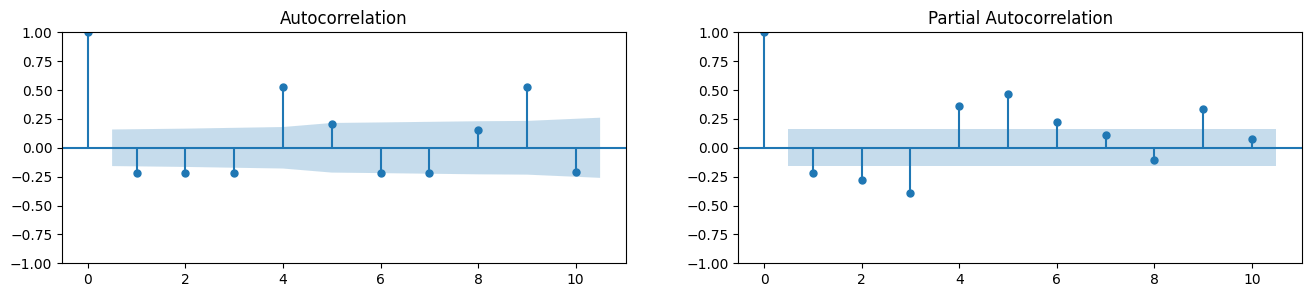


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6752  , p=0.1040  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=2.7277  , p=0.0986  , df=1
likelihood ratio test: chi2=2.7041  , p=0.1001  , df=1
parameter F test:         F=2.6752  , p=0.1040  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.9132  , p=0.0034  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=12.2206 , p=0.0022  , df=2
likelihood ratio test: chi2=11.7628 , p=0.0028  , df=2
parameter F test:         F=5.9132  , p=0.0034  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=17.9328 , p=0.0000  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=56.3601 , p=0.0000  , df=3
likelihood ratio test: chi2=48.0277 , p=0.0000  , df=3
parameter F test:         F=17.9328 , p=0.0000  , df_denom=147, df_num=3
Granger Causality Test: France | India
Spearman Correlation
SpearmanrResult(correlation=0.0464

In [888]:
def perform_analysis(dataframe, countries):
    for country in countries:
        print("=====================================")
        print(country)
        print("=====================================")

        # Get sum of Value each day
        data_for_country = dataframe.get_group(country)
        data_for_country = data_for_country[VALUE_COLUMN].resample(TIME_METRIC).sum()

        # Stationarity tests
        adf_test(data_for_country)
        kpss_test(data_for_country)

        # Autocorrelation plots
        autocorrelation_plots(data_for_country, lag=10)

        # Granger Causality Test
        for other_country in countries:
            if other_country != country:
                data_for_other_country = dataframe.get_group(other_country)[VALUE_COLUMN].resample(TIME_METRIC).sum()
                combined = pandas.DataFrame({'original': data_for_country, 'target': data_for_other_country}).fillna(0)
                grangercausality_test(combined, maxlag=3)
                print(f'Granger Causality Test: {country} | {other_country}')
                try:
                    spearman_correlation(combined['original'], combined['target'])
                    pearson_correlation(combined['original'], combined['target'])
                except: pass
                print()
                print()

        print()
        print()
        print()
        print()
        print()

print("===============================================================================================================")
print("Country of Origin")
print("===============================================================================================================")
COUNTRY_OF_ORIGINS_TO_ANALYZE = data.groupby(COUNTRY_OF_ORIGIN_COLUMN).size().sort_values(ascending=False).head(10).index.values.tolist()
data_grouped_by_country_of_origin = data.groupby(COUNTRY_OF_ORIGIN_COLUMN)
perform_analysis(data_grouped_by_country_of_origin, COUNTRY_OF_ORIGINS_TO_ANALYZE)

print("===============================================================================================================")
print("Country of Destination")
print("===============================================================================================================")
COUNTRY_OF_DESTINATIONS_TO_ANALYZE = data.groupby(COUNTRY_OF_DESTINATION_COLUMN).size().sort_values(ascending=False).head(NUMBER_OF_COUNTRIES_TO_ANALYZE).index.values.tolist()
data_grouped_by_country_of_destination = data.groupby(COUNTRY_OF_DESTINATION_COLUMN)
perform_analysis(data_grouped_by_country_of_destination, COUNTRY_OF_DESTINATIONS_TO_ANALYZE)